In [1]:
import pandas as pd
test=pd.read_csv("./data2/test.csv",index_col="no")
train=pd.read_csv("./data2/train.csv",index_col="no")

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
train.shape,test.shape

((29305, 106), (19537, 105))

<AxesSubplot:xlabel='age', ylabel='count'>

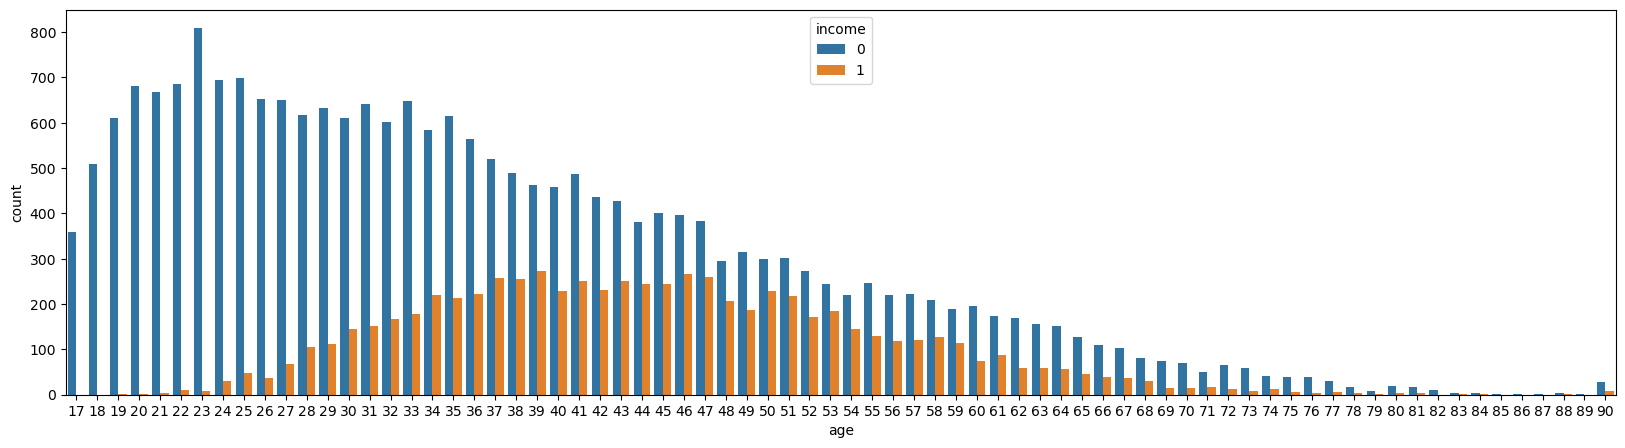

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,5))
sns.countplot(data = train,
             x='age',
             hue='income')

In [4]:
train.drop(['fnlwgt'],axis=1, inplace=True)
test.drop(['fnlwgt',],axis=1, inplace=True)

In [9]:
def remove_blank(row):
    return row.strip()
for i in train.columns:
    if train[i].dtype =='int64':pass
    else:train[i] = train[i].apply(remove_blank)
for i in test.columns:
    if test[i].dtype =='int64':pass
    else:test[i] = test[i].apply(remove_blank)

In [11]:
train

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,
1,25,Private,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29302,21,Private,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29303,18,Self-emp-not-inc,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0


In [12]:
train['workclass'][train['workclass']=='?']='Never-worked'
test['workclass'][test['workclass']=='?']='Never-worked'

In [13]:
train['native-country'][train['native-country']=='?']='Dual-nationality'
test['native-country'][test['native-country']=='?']='Dual-nationality'

In [14]:
train['occupation'][train['occupation']=='?']='Never-worked'
test['occupation'][test['occupation']=='?']='Never-worked'

In [15]:
train.drop(['education-num'],axis=1, inplace=True)
test.drop(['education-num',],axis=1, inplace=True)

In [17]:
train

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,
1,25,Private,11th,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,Some-college,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,Bachelors,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,Assoc-voc,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,Some-college,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,HS-grad,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29302,21,Private,HS-grad,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29303,18,Self-emp-not-inc,10th,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0


In [18]:
categorical_features=['workclass','education', 'marital-status', 'occupation', 'relationship','race','sex','native-country']

In [19]:
for feature_name in categorical_features:
    one_hot=pd.get_dummies(test[feature_name],prefix=feature_name) # 원핫 인코딩
    test.drop(feature_name, axis=1, inplace=True) # 기존 글자형태 컬럼 삭제
    test = pd.concat([test,one_hot],axis=1) 

In [20]:
for feature_name in categorical_features:
    one_hot=pd.get_dummies(train[feature_name],prefix=feature_name) # 원핫 인코딩
    train.drop(feature_name, axis=1, inplace=True) # 기존 글자형태 컬럼 삭제
    train = pd.concat([train,one_hot],axis=1)

In [21]:
set(train.columns)-set(test.columns)

{'income', 'native-country_Holand-Netherlands'}

In [22]:
test['native-country_Holand-Netherlands']=0

In [24]:
X_train = train.drop('income',axis=1)
y_train=train['income']

In [25]:
X_test =test

In [26]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from lightgbm import early_stopping
from lightgbm import log_evaluation
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [27]:
score_lst = []
for i in range(400,1000,100):
    AdaBoost_model = AdaBoostClassifier(n_estimators=i)
    score = cross_val_score(AdaBoost_model,X_train, y_train, cv =5)
    score_lst.append(score.mean())

In [30]:
adaboost = AdaBoostClassifier(n_estimators=900)

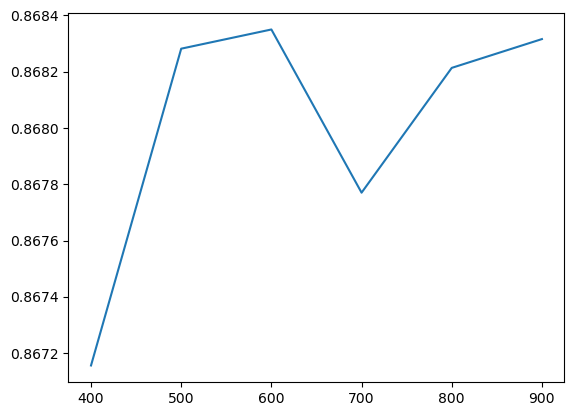

In [28]:
x = range(400,1000,100)
plt.plot(x, score_lst)

In [31]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=900)

In [32]:
pre = adaboost.predict(X_test)

In [33]:
sub = pd.read_csv('data2/sample_submission.csv')

In [34]:
sub['income'] = pre

In [35]:
sub.to_csv('practice12.csv',index=False)

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
score_lst = []
for i in range(400,1000,100):
    Gradient_model = GradientBoostingClassifier(n_estimators=i)
    score = cross_val_score(Gradient_model,X_train, y_train, cv =5)
    score_lst.append(score.mean())

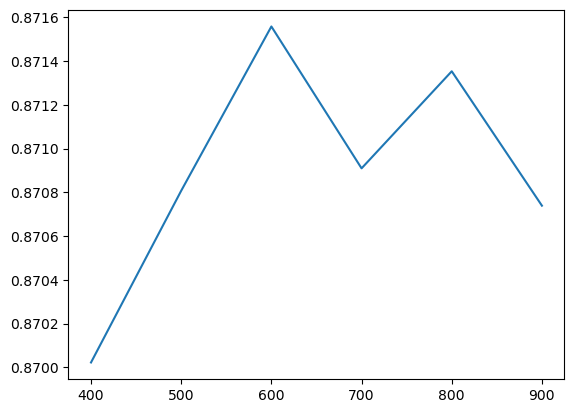

In [39]:
x = range(400,1000,100)
plt.plot(x, score_lst)

In [40]:
gbm = GradientBoostingClassifier(n_estimators=600,learning_rate=0.1,max_depth=5)

In [41]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=600)

In [42]:
pre = gbm.predict(X_test)

In [43]:
sub = pd.read_csv('data2/sample_submission.csv')
sub['income'] = pre
sub.to_csv('practice14.csv',index=False)